In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [2]:
df=pd.read_csv("../../data/merged/len4_ndb_DN.csv",encoding="shift-jis",index_col=0)

In [3]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df=df.loc[df["generic_share_q"]>0]
df["price"]=df["revenue"]/df["総計"]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

In [4]:
# # all data
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# # till elapsed_20
# # formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"


# # add generic indicator
# formula+="+後発品区分"

# # add generic per
# formula+="+generic_per"
# # generic_share_r
# formula+=" + generic_share_r"
# # generic_share_q
# formula+=" + generic_share_q"

# mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
# res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# # print(res_fe.summary.tables[0])
# # print(res_fe)
# # plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all")

                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
elapsed_m7              -0.1610     0.0609    -2.6427     0.0089     -0.2812     -0.0408
elapsed_m6              -0.2348     0.0615    -3.8182     0.0002     -0.3562     -0.1135
elapsed_m5              -0.1242     0.0477    -2.6020     0.0100     -0.2184     -0.0300
elapsed_m4              -0.0867     0.0300    -2.8915     0.0043     -0.1459     -0.0275
elapsed_m3              -0.1050     0.0268    -3.9203     0.0001     -0.1579     -0.0522
elapsed_m2              -0.0695     0.0270    -2.5721     0.0109     -0.1228     -0.0162
elapsed_0                0.0011     0.0392     0.0272     0.9784     -0.0762      0.0784
elapsed_1               -0.0458     0.0415    -1.1027     0.2716     -0.1277      0.0361
elapsed_2            

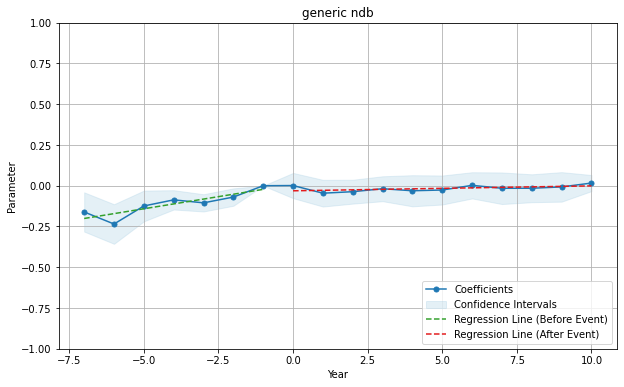

In [5]:
# generic data
formula="log_quantity~elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"

# add generic_per
formula+="+log(generic_per)"
# generic_share_r
# formula+=" + generic_share_r"
# generic_share_q
# formula+="+log(薬価)"
formula+=" + log(generic_share_q)"
# formula+="+log(price)"

mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3084
Estimator:                   PanelOLS   R-squared (Between):             -0.1359
No. Observations:                 241   R-squared (Within):              -15.861
Date:                Sun, Dec 31 2023   R-squared (Overall):             -0.2968
Time:                        18:15:18   Log-likelihood                    171.60
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.5835
Entities:                          31   P-value                           0.0000
Avg Obs:                       7.7742   Distribution:                  F(18,185)
Min Obs:                       3.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             6.6609
                            

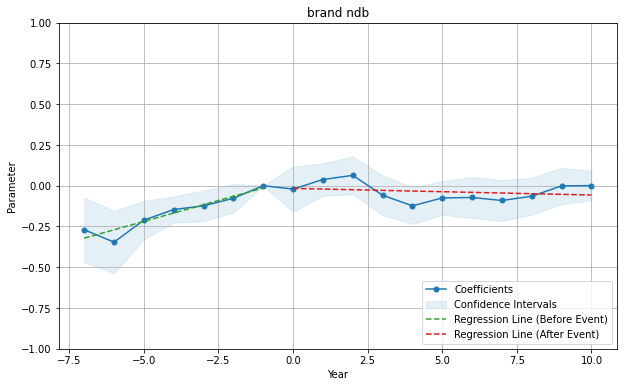

In [6]:
# branded data
formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"
# add generic_per
formula+="+log(generic_per)"
# generic_share_r
# formula+=" + generic_share_r"
# generic_share_q
formula+=" + log(generic_share_q)"
# formula+=" + log(薬価)"
# formula+="+log(price)"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand",title="brand ndb")
